In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import scipy as sci

#1: create functions for each of my temperature profiles:

def const_density(R_star, density, r, high_mass = True):
    M_sun = 1.989*10**30 #[kg]
    G = 6.673*10**-11 # [m^3 kg^-1 s^-2]
    R_sun = 6.955*10**8 #[m]
    mu = 1.30
    mp = 1.673*10**-27 # [kg] 
    k = 1.381*10**-23 # [m^2 kg s^-2 K^-1]
    
    if high_mass == True:
        T_r = (((-2*(density**2)*G*r**2)/3)+((3*G*M_sun)/(8*np.pi*R_star**4))*((R_star/(1.33*R_sun))**(-0.55*2)))*((mu*mp)/k*density)
    if high_mass == False:
        T_r = (((-2*(density**2)*G*r**2)/3)+((3*G*M_sun)/(8*np.pi*R_star**4))*((R_star/(1.06*R_sun))**(-0.945*2)))*((mu*mp)/k*density)
    
    return T_r

def test_temp_profile(r_Rstar, T_c):
   
    T_r = T_c/(r_Rstar**0.1)
    
    return T_r


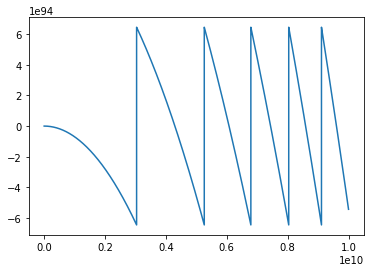

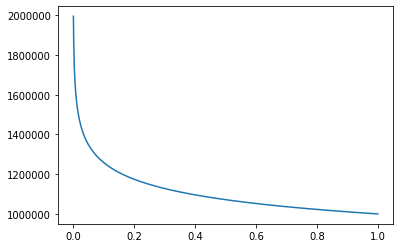

In [5]:
radius = np.arange(0,10**10, 1000)

plt.plot(radius, const_density(10**6, 10**30, radius))
plt.show()

plt.plot(np.arange(0.001, 1, 0.001), test_temp_profile(np.arange(0.001, 1, 0.001), 10**6))
plt.show()

In [13]:
def mean_free_path(central_temp, density, temp_profile, r, alpha):
    l = alpha*r/(density*(temp_profile(r,central_temp))**-3.5)
    return l
    

In [16]:
N = 100000
r = (1*10)**-10
x = []
y = []
z = []
for n in range(N):
    theta = rand.uniform(0,2*np.pi)
    phi = rand.uniform(0,2*np.pi)
    l = mean_free_path(10**6, 1000, test_temp_profile, r, 1)
    print(l)
    r = r+l
    X = r * np.sin(phi) * np.cos(theta)
    Y = r * np.sin(phi) * np.sin(theta)
    Z = r * np.cos(phi)
    x.append(X)
    y.append(Y)
    z.append(Z)
    if r > 1:
        break

fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(x,y,z)
plt.show()

316227766016.8379


ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>